In [1]:
import os
import sys
import gensim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import networkx as nx

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\joris\\Documents\\eScience_data\\data'
sys.path.insert(0, ROOT)
sys.path.insert(0, "C:\\Users\\joris\\Documents\\eScience_data\\spec2vec_gnps_data_analysis\\custom_functions")

In [2]:
from matchms.importing import load_from_json
outfile = os.path.join(path_data, 'gnps_positive_ionmode_cleaned_by_matchms_and_lookups.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        spectrums = pickle.load(inf)
else:
    filename = os.path.join(path_data,'gnps_positive_ionmode_cleaned_by_matchms_and_lookups.json')
    spectrums = load_from_json(filename)
    with open(outfile, 'wb') as outf:
        pickle.dump(spectrums, outf)

print("number of spectra:", len(spectrums))

C:\Users\joris\Documents\eScience_data\data\gnps_positive_ionmode_cleaned_by_matchms_and_lookups.pickle
number of spectra: 112956


In [13]:
targets = []
target_name = "kaempferol"
for spectrum in spectrums:
    comp_name = spectrum.metadata.get("compound_name")
    if comp_name:
        if target_name in comp_name.lower():
            targets.append(spectrum)
print(f"Found {len(targets)} spectra containing target name")

Found 293 spectra containing target name


In [18]:
for i, target in enumerate(targets):
    print(i, target.get("compound_name"))

0 Kaempferol
1 kaempferol-3-O-robinobioside
2 kaempferol-3-O-glucoside
3 kaempferol
4 kaempferol-3-O-hexoxyl-hexoside
5 kaempferol-3-O-hexoxyl-hexoside
6 kaempferol-7-O-hexosyl-deoxyhexoside
7 kaempferol-7-O-hexoside
8 kaempferol-3-O-pentoside
9 kaempferol-3-O-pentoxyl-pentoside
10 kaempferol-7-O-deoxyhexoside
11 kaempferol-O-pentosyl-pentoside acetate
12 kaempferol-O-pentosyl-deoxyhexoside
13 kaempferol-O-acetylhexoside
14 methoxy-methylkaempferol-O-hexosyl-deoxyhexoside
15 kaempferol
16 kaempferol
17 Kaempferol
18 Kaempferol-Glucoside
19 Kaempferol
20 Kaempferol 3-O-rutinoside
21 Kaempferol 3-O-rutinoside
22 Dihydrokaempferol
23 Kaempferol 3-O-rutinoside
24 Dihydrokaempferol
25 Kaempferol 3-O-rutinoside
26 Kaempferol 3-O-rutinoside
27 Kaempferol
28 Kaempferol 3-O-rutinoside
29 Kaempferol
30 Kaempferol 3-O-rutinoside
31 Kaempferol 3-O-rutinoside
32 Kaempferol 3-O-rutinoside
33 Kaempferol
34 Kaempferol 3-O-rutinoside
35 Dihydrokaempferol
36 Kaempferol 3-O-rutinoside
37 Kaempferol 3-O-r

In [17]:
# choose number 1: kaempferol-3-O-robinobioside
from matchms.exporting import save_as_json
outfile = os.path.join(path_data, "kaempferol-3-O-robinobioside.json")
save_as_json(targets[1:2], outfile)

In [20]:
targets[1].get("spectrum_id")

'CCMSLIB00000578388'

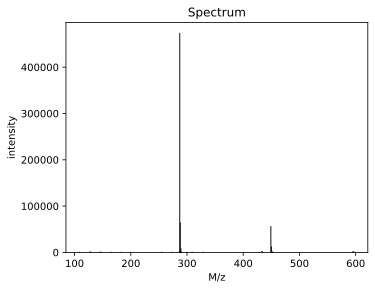

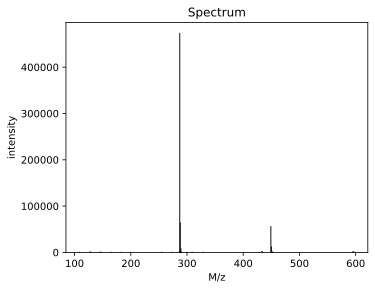

In [22]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
targets[1].plot()

In [46]:
#now a spectrum for a quercetin based molecule
targets2 = []
target_name2 = "quercetin"
for spectrum in spectrums:
    comp_name = spectrum.metadata.get("compound_name")
    smiles = spectrum.metadata.get("smiles")
    if comp_name and smiles:
        if target_name2 in comp_name.lower():
            targets2.append(spectrum)
print(f"Found {len(targets2)} spectra containing target name")

Found 189 spectra containing target name


In [47]:
for i, target in enumerate(targets2):
    print(i, target.get("compound_name"))

0 Quercetin
1 Quercetin 3-O-alpha-rhamnopy ranoside
2 3-O-methylquercetin
3 3'-O-Methylquercetin
4 3-O-beta-(6''-trans-caffeoyl)-galactopyranosyl quercetin
5 3-O-beta-(6''-trans-caffeoyl)-galactopyranosyl quercetin
6 Quercetin 3,7-dimethyl ether
7 quercetin-3-O-robinobioside
8 quercetin-3-O-glc-1-3-rham-1-6-glucoside
9 dihydroquercetin
10 quercetin
11 quercetin-3-O-pentosyl-7-O-hexoside
12 quercetin-3-O-hexoside
13 quercetin-3-O-pentosyl-pentoside
14 quercetin-3-O-pentoside
15 quercetin-3-O-deoxyhexoside
16 quercetin
17 quercetin
18 Quercetin
19 Quercetin
20 Quercetin
21 Quercetin 3,5,7,3',4'-pentamethyl ether
22 Quercetin
23 Quercetin
24 Quercetin 3'-methyl ether
25 Quercetin 3,5,7,3',4'-pentamethyl ether
26 Quercetin
27 Quercetin
28 Quercetin-3,7,3',4'-tetramethyl ether
29 Quercetin 3'-methyl ether
30 BML01255 Dihydroquercetin|2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychroman-4-one
31 BML01383 Peracetate Quercetin
32 BML01392 Peracetate Quercetin
33 BML01401 Peracetate Quercetin
34 Que

In [51]:
#lets do 47 Quercetin 3-(6-O-acetyl-beta-glucoside)

x = 64
outfile = os.path.join(path_data, f"{targets2[x].get('compound_name')}.json")
save_as_json(targets2[x:x+1], outfile)


In [52]:
targets2[x].metadata

{'spectrum_id': 'CCMSLIB00004687777',
 'source_file': 'library_mgf.mgf',
 'task': 'f781073849a843edb5b9decdb0f79acd',
 'scan': '-1',
 'ms_level': '2',
 'library_membership': 'MONA',
 'spectrum_status': '1',
 'splash': 'null-null-null-null',
 'submit_user': 'mwang87',
 'compound_name': 'quercetin 3-O-glucuronide',
 'ion_source': 'N/A',
 'compound_source': 'isolated',
 'instrument': 'Linear Ion Trap',
 'pi': 'MoNA',
 'data_collector': 'MoNA:VF-NPL-LTQ004012',
 'adduct': 'M-H',
 'precursor_mz': 516.889,
 'exactmass': '0.0',
 'charge': 1,
 'cas_number': 'N/A',
 'pubmed_id': 'N/A',
 'smiles': 'O=C(O)[C@H]1O[C@@H](Oc2c(-c3ccc(O)c(O)c3)oc3cc(O)cc(O)c3c2=O)[C@H](O)[C@@H](O)[C@@H]1O',
 'inchi': 'InChI=1S/C21H18O13/c22-7-4-10(25)12-11(5-7)32-17(6-1-2-8(23)9(24)3-6)18(13(12)26)33-21-16(29)14(27)15(28)19(34-21)20(30)31/h1-5,14-16,19,21-25,27-29H,(H,30,31)/t14-,15-,16+,19-,21+/m0/s1',
 'inchiaux': 'N/A',
 'library_class': '3',
 'spectrumid': 'CCMSLIB00004687777',
 'ionmode': 'positive',
 'create_ti

In [28]:
#now a spectrum for a  based molecule
targets3 = []
target_name3 = "ferulic acid"
for spectrum in spectrums:
    comp_name = spectrum.metadata.get("compound_name")
    if comp_name:
        if target_name3 in comp_name.lower():
            targets3.append(spectrum)
print(f"Found {len(targets3)} spectra containing target name")

Found 41 spectra containing target name


In [30]:
for i, target in enumerate(targets3):
    print(i, target.get("compound_name"))

0 trans-Ferulic Acid
1 trans-Ferulic acid
2 trans-Ferulic acid
3 trans-Ferulic acid
4 trans-Ferulic acid
5 trans-Ferulic acid
6 trans-Ferulic acid
7 trans-Ferulic acid
8 trans-Ferulic acid
9 trans-Ferulic acid
10 Ferulic Acid
11 Ferulic Acid
12 isoferulic acid
13 isoferulic acid
14 isoferulic acid
15 isoferulic acid
16 isoferulic acid
17 isoferulic acid
18 isoferulic acid
19 isoferulic acid
20 isoferulic acid
21 isoferulic acid
22 isoferulic acid
23 isoferulic acid
24 Ferulic Acid
25 Ferulic Acid
26 Ferulic Acid
27 Ferulic Acid
28 Ferulic Acid
29 Ferulic Acid
30 Ferulic Acid
31 Ferulic Acid
32 Ferulic Acid
33 Ferulic Acid
34 Ferulic Acid
35 Ferulic Acid
36 Ferulic acid glucuronide
37 Ferulic acid hexose
38 trans-Ferulic acid
39 trans-Ferulic acid
40 trans-Ferulic acid


In [33]:
#lets do 12 Ferulic acid hexose
x = 12
outfile = os.path.join(path_data, "isoferulic acid.json")
save_as_json(targets3[x:x+1], outfile)

In [53]:
targets3[12].get("inchikey")

'QURCVMIEKCOAJU-HWKANZROSA-N'